# quant-econ Solutions: Default Risk and Income Fluctuations

Solutions for http://quant-econ.net/py/arellano.html

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
from arellano_vfi import Arellano_Economy

Compute the value function, policy and equilibrium prices

In [3]:
ae = Arellano_Economy(beta=.953,        # time discount rate
                        gamma=2.,       # risk aversion
                        r=0.017,        # international interest rate
                        rho=.945,       # persistence in output 
                        eta=0.025,      # st dev of output shock
                        theta=0.282,    # prob of regaining access 
                        ny=21,          # number of points in y grid
                        nB=251,         # number of points in B grid
                        tol=1e-8,       # error tolerance in iteration
                        maxit=10000)

Running iteration 25 with dist of 0.3432423298900247
Running iteration 50 with dist of 0.09839155779847886
Running iteration 75 with dist of 0.029212095591656606
Running iteration 100 with dist of 0.00874510696905162
Running iteration 125 with dist of 0.002623141215583047
Running iteration 150 with dist of 0.0007871926699110077
Running iteration 175 with dist of 0.00023625911163094315
Running iteration 200 with dist of 7.091000629344535e-05
Running iteration 225 with dist of 2.12828211445526e-05
Running iteration 250 with dist of 6.387802962137812e-06
Running iteration 275 with dist of 1.9172289675850607e-06
Running iteration 300 with dist of 5.754352905285032e-07
Running iteration 325 with dist of 1.7271061736323645e-07
Running iteration 350 with dist of 5.1837215409022974e-08
Running iteration 375 with dist of 1.555838125000264e-08


Compute the bond price schedule as seen in figure 3 of Arellano (2008)

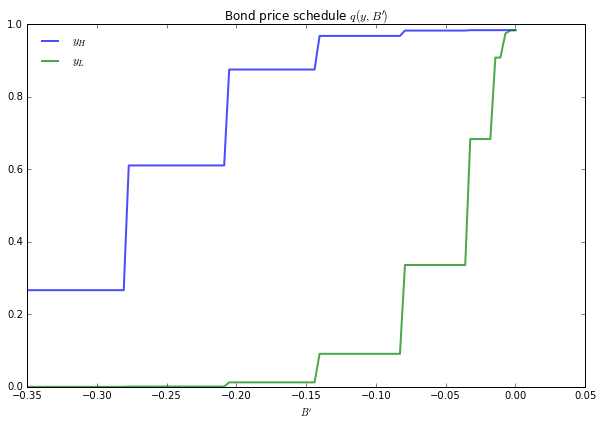

In [4]:

# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid)*1.05, np.mean(ae.ygrid)*.95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Bond price schedule $q(y, B')$")

# Extract a suitable plot grid
x = []
q_low = []
q_high = []
for i in range(ae.nB):
    b = ae.Bgrid[i]
    if -0.35 <= b <= 0:  # To match fig 3 of Arellano
        x.append(b)
        q_low.append(ae.Q[iy_low, i])
        q_high.append(ae.Q[iy_high, i])
ax.plot(x, q_high, label=r"$y_H$", lw=2, alpha=0.7)
ax.plot(x, q_low, label=r"$y_L$", lw=2, alpha=0.7)
ax.set_xlabel(r"$B'$")
ax.legend(loc='upper left', frameon=False)
plt.show()

Draw a plot of the value functions

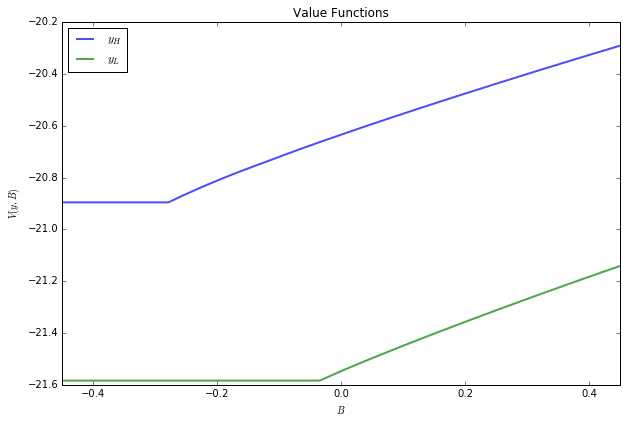

In [5]:

# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid)*1.05, np.mean(ae.ygrid)*.95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Value Functions")
ax.plot(ae.Bgrid, ae.V[iy_high], label=r"$y_H$", lw=2, alpha=0.7)
ax.plot(ae.Bgrid, ae.V[iy_low], label=r"$y_L$", lw=2, alpha=0.7)
ax.legend(loc='upper left')
ax.set_xlabel(r"$B$")
ax.set_ylabel(r"$V(y, B)$")
ax.set_xlim(ae.Bgrid.min(), ae.Bgrid.max())
plt.show()

Draw a heat map for default probability

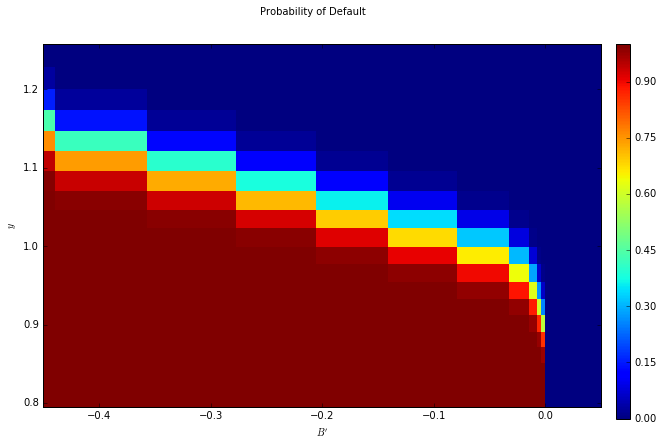

In [6]:

xx, yy = ae.Bgrid, ae.ygrid
zz = ae.default_prob

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.5))
fig.suptitle("Probability of Default")
hm = ax.pcolormesh(xx, yy, zz)
cax = fig.add_axes([.92, .1, .02, .8])
fig.colorbar(hm, cax=cax)
ax.axis([xx.min(), 0.05, yy.min(), yy.max()])
ax.set_xlabel(r"$B'$")
ax.set_ylabel(r"$y$")
plt.show()

Plot a time series of major variables simulated from the model.

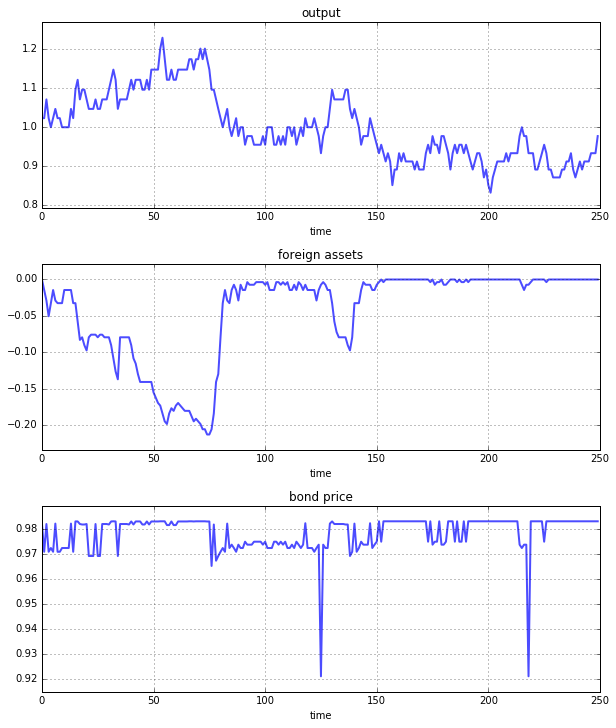

In [7]:
T = 250
y_vec, B_vec, q_vec, default_vec = ae.simulate(T)

# Pick up default start and end dates
start_end_pairs = []
i = 0
while i < len(default_vec):
    if default_vec[i] == 0:
        i += 1
    else:
        # If we get to here we're in default
        start_default = i
        while i < len(default_vec) and default_vec[i] == 1:
            i += 1
        end_default = i - 1
        start_end_pairs.append((start_default, end_default))
    
plot_series = y_vec, B_vec, q_vec
titles = 'output', 'foreign assets', 'bond price'

fig, axes = plt.subplots(len(plot_series), 1, figsize=(10, 12))
p_args = {'lw': 2, 'alpha': 0.7}
fig.subplots_adjust(hspace=0.3)

for ax, series, title in zip(axes, plot_series, titles):
    # determine suitable y limits
    s_max, s_min = max(series), min(series)
    s_range = s_max - s_min
    y_max = s_max + s_range * 0.1
    y_min = s_min - s_range * 0.1
    ax.set_ylim(y_min, y_max)
    for pair in start_end_pairs:
        ax.fill_between(pair, (y_min, y_min), (y_max, y_max), color='k', alpha=0.3)
        
    ax.grid()
    ax.set_title(title)
    ax.plot(range(T), series, **p_args)
    ax.set_xlabel(r"time")

plt.show()